In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("C:/Users/Shahbaz/Downloads/avocado.csv/avocado.csv")

In [3]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
#Here , Unnamed:0 is just representation of index hence we can remove that.

In [9]:
df.drop('Unnamed: 0', axis=1,inplace=True)

In [10]:
#Checking back again our data.

In [12]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


#Here we observe that there are no missing values. Let's perform some feature engineering on this so that we would be able to use day and month columns in building our machine learning model later.

In [14]:
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)

In [15]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [16]:
#Plotting the avacado's average price through the data column.

Text(0.5, 1.0, 'Average Price')

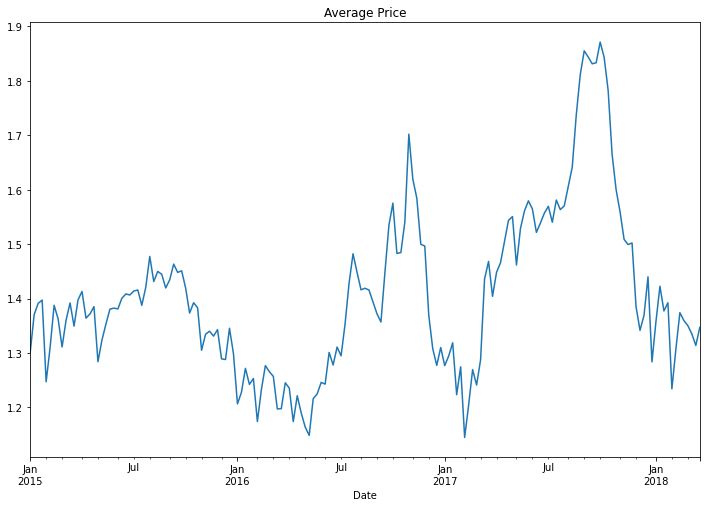

In [17]:
byDate=df.groupby('Date').mean()
plt.figure(figsize=(12,8))
byDate['AveragePrice'].plot()
plt.title('Average Price')

In [18]:
#Finding the relationship between Correlation.

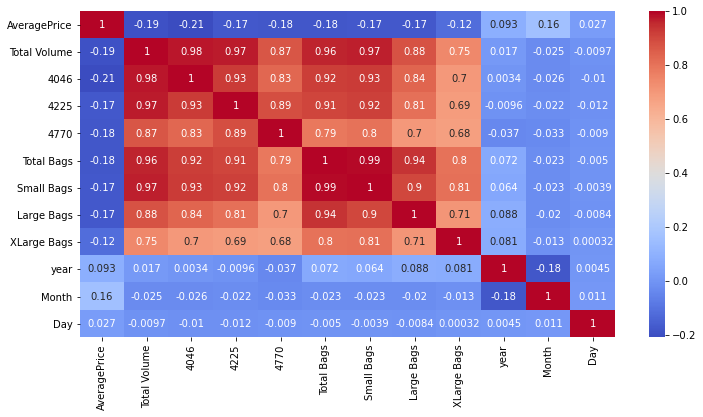

In [19]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

#here , we seeall the features are not correlated with the Average price column, instead most of them are correlated with each other. This will not give us good model hence will do feature engineering on categorical features: region & type.

In [20]:
df['region'].nunique()

54

In [21]:
df['type'].nunique()

2

#Here we see there are 54 regions and 2 unique types. it will be easy to transform the type features to dummies but for the region i'll drop the entire column. and also willd rop the Date feature as well because we already have 3 other columns for Year,Month and Day.

In [22]:
df_final=pd.get_dummies(df.drop(['region','Date'],axis=1),drop_first=True)

In [23]:
df_final.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day,type_organic
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12,27,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12,20,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,12,13,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,12,6,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,11,29,0


In [24]:
df_final.tail()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day,type_organic
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,2,4,1
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,1,28,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,1,21,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,1,14,1
18248,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,2018,1,7,1


Will apply Linear regression now since because target variable 'AveragePrice' is continuous. We will first split up our data into an X array that contains the feature to train on,and a y array with target variable. 

In [25]:
x=df_final.iloc[:,1:14]
y=df_final['AveragePrice']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [26]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)

In [27]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,pred))
print('MSE:',metrics.mean_squared_error(y_test,pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

MAE: 0.2329713329170077
MSE: 0.0910880280536491
RMSE: 0.3018079323902026


The RMSE is low so we can conclude that we have a good model,but lets check to be more sure. Plotting y_test vs. predictions.

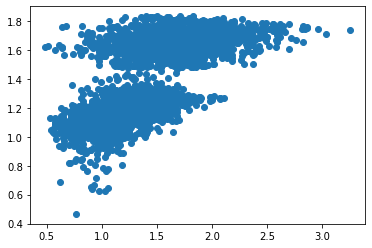

In [28]:
plt.scatter(x=y_test,y=pred)

In [29]:
# As we see here it doesn't have a straight line. Not sure if it is best model for our data.

Working with DecisionTreeRegressor model

In [30]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)

Text(0, 0.5, 'Predicted Y')

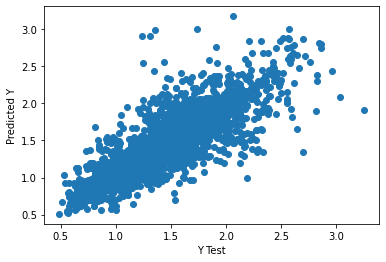

In [31]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [32]:
#Here we see we have a nearly straight line hence it is better than Linear Regression model. Checking RMSE to be just more sure.

In [33]:
print('MAE:', metrics.mean_absolute_error(y_test,pred))
print('MSE:', metrics.mean_squared_error(y_test,pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,pred)))

MAE: 0.13576438356164383
MSE: 0.0450998904109589
RMSE: 0.21236734779847607


In [34]:
#Here we see RMSE is lower than the previous one we have with LinearRegression. 
#Trying one last model to see if i can improve my predictions for this data which is RandomForestRegressor.

In [35]:
from sklearn.ensemble import RandomForestRegressor
rdr=RandomForestRegressor()
rdr.fit(x_train,y_train)
pred=rdr.predict(x_test)
        

In [36]:
print('MAE:', metrics.mean_absolute_error(y_test,pred))
print('MSE:', metrics.mean_squared_error(y_test,pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,pred)))

MAE: 0.10093794520547945
MSE: 0.021415141098630134
RMSE: 0.14633913044237393


As we can see the RMSE is lower than the two previous models , so here RandomForestRegressor is considered to be the best model among all.

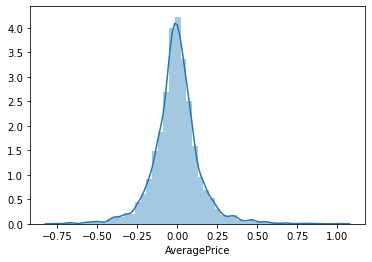

In [39]:
sns.distplot((y_test-pred),bins=50)

Notice here that our residuals looked normally distributed and hence our choice of model (RandomForestRegressor) was correct choice for data.

,Y Test,Pred
8604,0.82,0.9442
2608,0.97,0.9930
14581,1.44,1.3839
4254,0.97,0.9046
16588,1.45,1.4544


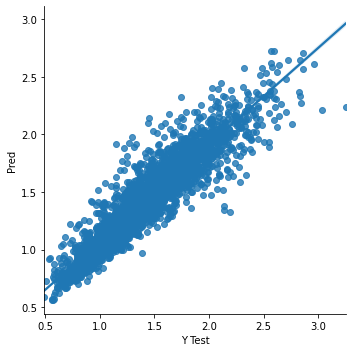

In [41]:
data= pd.DataFrame({'Y Test':y_test, 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()